Notebook zu Python: Objektorientierte Programmierung: Vererbung

Version 1.2, 12. März 2024, Informatik, EAH Jena

(c) Christina B. Class



**Hinweis:** 
In der Basisklasse/Superklasse verwenden wir Information Hiding, um zu zeigen, dass eine Unterklasse/Subklasse keinen Zugriff auf solche Attribute hat. 

In Unterklasse dagegen verzichten wir auf Information Hiding, um `jdc` verwenden zu können. `jdc` ermöglicht es, **einmal** eine Methodenimplementation zu "überschreiben", so dass wir nur jedes zweite Mal den kompletten Code der Klasse angeben müssen.

(Genau gesagt, erzeugt `jdc` bei  Verwendung von  `%%add_to` einfach eine Unterklasse mit demselben Namens.)

Importieren Sie `jdc`, indem Sie folgende Codezeile ausführen.


In [ ]:
import jdc

# Vererbung

## 1. Die Superklasse / Basisklasse

Als Basisklasse ist folgende Klasse mit einem privaten und einem öffentlichen Attribut gegeben.

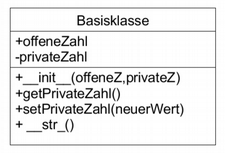

Die Klasse wird mit folgendem Python Code implementiert:

In [ ]:
class Basisklasse:
    def __init__(self,offeneZ,privateZ):
        self.offeneZahl=offeneZ
        self.__privateZahl=privateZ
        
    def getPrivateZahl(self):
        return self.__privateZahl
    
    def setPrivateZahl(self,neuerWert):
        self.__privateZahl=neuerWert
        
    def __str__(self):
        return 'O: '+str(self.offeneZahl)+\
            ' P: '+str(self.__privateZahl)

## 2. Einfache Vererbung

Wir definieren nun die Klasse `MeineKlasse`, die eine Unterklasse / Subklasse der Klasse `Basisklasse` ist.

Im einfachsten Fall definieren wir nur die Vererbung und lassen die Implementation der Klasse leer. Hierzu verwenden wir das Wort `pass`.

In [ ]:
class MeineKlasse(Basisklasse):
    pass

Wir erzeugen nun ein Objekt von `MeineKlasse`. In einer ersten Version des Codes schreiben wir:

In [ ]:
obj=MeineKlasse()

Wir erhalten hier den `TypeError: __init__() missing 2 required positional arguments: 'offeneZ' and 'privateZ'`.

Daraus können wir schließen:

Wenn wir eine Klasse schreiben, die von einer anderen Klasse erbt, ohne einen Konstruktor zu schreiben, wird der Konstruktor der Basisklasse aufgerufen. 

Wir erzeugen nun also ein Objekt wie folgt und übergeben Parameterwerte für den Konstruktor der Basisklasse:

In [ ]:
obj=MeineKlasse(1,10)

Wir können nun das Objekt verwenden:

In [ ]:
print(obj)
print(obj.getPrivateZahl())
obj.setPrivateZahl(20)
print(obj)
obj.offeneZahl=13

## 3. Methoden der Subklasse

Wir können nun Methoden in der Subklasse definieren. Hierbei können wir auf öffentliche Attribute der Basisklasse zugreifen.

In [ ]:
class MeineKlasse(Basisklasse):
    def hallo(self):
        print('Hallo')
        
    def gibOffeneZahlAus(self):
        print(self.offeneZahl)
        
    def veraendereOffeneZahl(self,neuerWert):
        self.offeneZahl=neuerWert 

Wir können diese Methoden dann verwenden:

In [ ]:
obj=MeineKlasse(1,10)
print(obj)
obj.hallo()
obj.gibOffeneZahlAus()
obj.veraendereOffeneZahl(12)
print(obj)

Es ist **nicht** möglich, auf private Objekte der Basisklasse zuzugreifen.

In [ ]:
%%add_to MeineKlasse
def gibPrivateZahlAus(self):
    print('wir sind in der Methode: gibPrivateZahlAus()')
    print(self.__privateZahl)

Beim Aufruf dieser Methode erhalten wir einen Fehler. 

In [ ]:
obj.gibPrivateZahlAus()

## 4. Attribute der Subklasse und Überschreiben von `__init__()`

Wir verändern nun unsere `Basisklasse` zur `Basisklasse2`und definieren Defaultwerte für die Parameter des Konstruktors.
Des Weiteren definieren wir eine neue Methode `ausgabe()`, die nur den Namen der Klasse ausgibt.

In [ ]:
class Basisklasse2:
    def __init__(self,offeneZ=1,privateZ=2):
        self.offeneZahl=offeneZ
        self.__privateZahl=privateZ
        
    def ausgabe(self):
        print('eine Methode der Basisklasse2')
        
    def getPrivateZahl(self):
        return self.__privateZahl
    
    def setPrivateZahl(self,neuerWert):
        self.__privateZahl=neuerWert
        
    def __str__(self):
        return 'O: '+str(self.offeneZahl)+\
            ' P: '+str(self.__privateZahl)

Von dieser Klasse erzeugen wir nun eine Subklasse `MeineKlasse2` mit einem neuen öffentlichen Attribut `zahl`, das im Konstruktor gesetzt wird. 

In [ ]:
class MeineKlasse2(Basisklasse2):
    def __init__(self,zahl):
        self.zahl=zahl

Wir testen nun diese Implementation:

- Erzeugung eines Objektes

In [ ]:
obj=MeineKlasse2(17)

erfolgreich

- Überprüfung der Klassenzugehörigkeit des Objektes

In [ ]:
isinstance(obj,MeineKlasse2)

In [ ]:
isinstance(obj,Basisklasse2)

$\Rightarrow$ erfolgreich 


- Aufruf der Methode `ausgabe()` von `Basisklasse2`, die nicht auf Attribute zugreift.

In [ ]:
obj.ausgabe()

$\Rightarrow$ erfolgreich 

- Ausgabe des Objektes mit `print()`

In [ ]:
print(obj)

Und hier haben wir einen **Fehler**. Die Funktion `print()` ruft die Methode `__str__()` in `Basisklasse2` auf, die auf das Attribut `offeneZahl` zugreift. Doch dieses existiert nicht. Denn der Konstruktor der `Basisklasse2` wurde nicht aufgerufen. 

**Es gilt:** Wird in einer Klasse ein Konstruktor (`__init__()`) implementiert, wird der Konstruktor der Basisklasse **nicht** automatisch aufgerufen!

In unserem Fall wurde zwar der Teil des Objektes, der zu `MeineKlasse2` gehört, erzeugt, einschließlich des Attributs `zahl`. Auch können die Methoden der Klasse `Basisklasse2` aufgerufen werden, weil das Objekt zu dieser Klasse gehört (vgl. den Aufruf `isinstance(obj,Basisklasse2)` ). Aber der "innere Kern" des Objektes, also der Teil, der die Eigenschaften der `Basisklasse2` enthält, wurde nicht erzeugt.

Einnerung an die Vorlesung: Um ein Objekt des Klasse `Buch` zu erzeugen, muss der innere Kern der Klasse `Medium` erzeugt werden.

Wir müssen also im Konstruktor von `MeineKlasse2` den Konstruktor der `Basisklasse2` aufrufen. Hierzu verwenden wir `super()`. 
Da der Konstruktor default Parameter hat, müssen keine Parameter übergeben werden.

Die korrigierte Implementation der Klasse `MeineKlasse2` lautet also:

In [ ]:
class MeineKlasse2(Basisklasse2):
    def __init__(self,zahl):
        super().__init__()
        self.zahl=zahl

Wir testen den Code erneut:

In [ ]:
obj=MeineKlasse2(17)
print('isinstance(obj,MeineKlasse2):',isinstance(obj,MeineKlasse2))
print('isinstance(obj,Basisklasse2):',isinstance(obj,Basisklasse2))
obj.ausgabe()
print(obj)

In der Regel haben die Parameter in Konstruktoren keine oder nur teilweise Defaultwerte.

**Daher gilt:**
hat der Konstruktor einer Basisklasse Parameter, werden diese als Parameter dem Konstruktor der Unterklasse übergeben und dann im Aufruf des Konstruktors der Basisklasse verwendet.

In diesem Fall würde der Konstruktor von `MeineKlasse2` folgendermaßen aussehen:

In [ ]:
class MeineKlasse2(Basisklasse2):
    def __init__(self,offeneZahl,privateZahl,zahl):
        super().__init__(offeneZahl,privateZahl)
        self.zahl=zahl

Wir testen die neue Klasse:

In [ ]:
obj=MeineKlasse2(-10,12,17)
print('isinstance(obj,MeineKlasse2):',isinstance(obj,MeineKlasse2))
print('isinstance(obj,Basisklasse2):',isinstance(obj,Basisklasse2))
obj.ausgabe()
print(obj)

## 5. Überschreiben von `__str__()`

Wie wir oben gesehen haben, können wir in Methoden von `MeineKlasse2` nicht auf private Attribute der `Basisklasse2` zugreifen.

Für diesen Zugriff sind wir auf getter und setter Methoden angwiesen.

Die Methode `__str__()` erzeugt eine Stringrepräsentation eines Objektes. Da Attribute in der Regel privat sind, gibt es in einer Unterklasse die folgenden Möglichkeiten, um private Attribute der Basisklasse in die Stringrepräsentation einzubeziehen:

1. es werden die getter Methoden der Basisklasse verwendet.
2. es wird die Stringrepräsentation der Basisklasse verwendet und zu Beginn oder am Ende mit Information der aktuellen Klasse ergänzt 

In diesem Notebook werden wir die zweite Möglichkeit nutzen.

Dies bedingt den Aufruf der Implementation von `__str__()` in der Basisklasse. Hier verwenden wir, wie auch im Konstruktor, `super()`.

Wir implementieren `__str__()` also wie folgt:

In [ ]:
class MeineKlasse2(Basisklasse2):
    def __init__(self,offeneZahl,privateZahl,zahl):
        super().__init__(offeneZahl,privateZahl)
        self.zahl=zahl

    def __str__(self):
        # die Zeichenkette s speichert die Rückgabe des Aufrufs von
        # __str__() der Basisklasse (für den "inneren Kern")
        s=super().__str__()
        return s+' Wert von Zahl: '+str(self.zahl)

In [ ]:
obj=MeineKlasse2(-10,12,17)

In [ ]:
print(obj)

**Aufgabe**:

Gegeben ist die folgende Klassenhierarchie: 

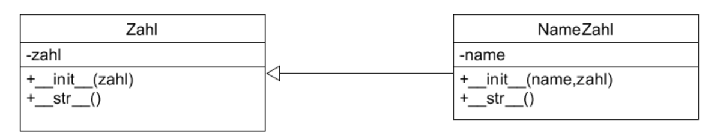

Untenstehend finden Sie die Implementation der Klasse `Zahl`.

Ergänzen Sie die Implementation der Klasse `NameZahl`.

Die Stringrepräsentation eines Objektes der Klasse `NameZahl` soll für die Werte `Name1` und `7`folgendermaßen aussehen:

`Name1 hat die 7`.

In [ ]:
class Zahl:
    def __init__(self,zahl):
        self.__zahl=zahl
        
    def __str__(self):
        return 'die '+str(self.__zahl)
    
# Ergaenzen Sie die Klasse NameZahl
class NameZahl(Zahl):
    def __init__(self,name,zahl):
        pass
        
    def __str__(self):
        return ''

Und testen Sie dann Ihren Code:

In [ ]:
test=NameZahl('Name1',7)
print(test)

*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.